In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

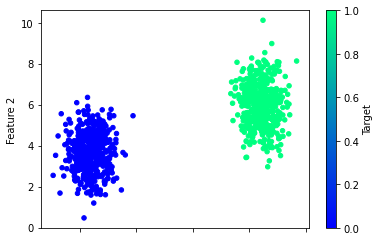

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features =2, random_state = 78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns = ["Feature 1", "Feature 2"])
df["Target"] = y

#Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c='Target', colormap="winter")

Train the data

In [3]:
# Use sklearn to split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 78)

NORMALIZE THE DATA

In [4]:
# Craete scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

CREATE THE NEURAL NETWORK

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add first Dense Layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = "relu", input_dim = 2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation ='sigmoid'))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit the model to the trainig data
fit_model=nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 577us/step - loss: 0.4877 - accuracy: 0.9773
Epoch 2/100
24/24 [==============================] - 0s 514us/step - loss: 0.4740 - accuracy: 0.9800
Epoch 3/100
24/24 [==============================] - 0s 522us/step - loss: 0.4610 - accuracy: 0.9813
Epoch 4/100
24/24 [==============================] - 0s 522us/step - loss: 0.4485 - accuracy: 0.9827
Epoch 5/100
24/24 [==============================] - 0s 565us/step - loss: 0.4365 - accuracy: 0.9827
Epoch 6/100
24/24 [==============================] - 0s 522us/step - loss: 0.4248 - accuracy: 0.9827
Epoch 7/100
24/24 [==============================] - 0s 528us/step - loss: 0.4137 - accuracy: 0.9840
Epoch 8/100
24/24 [==============================] - 0s 565us/step - loss: 0.4028 - accuracy: 0.9840
Epoch 9/100
24/24 [==============================] - 0s 565us/step - loss: 0.3925 - accuracy: 0.9867
Epoch 10/100
24/24 [==============================] - 0s 565us/step - loss: 0.3826 - accura

24/24 [==============================] - 0s 565us/step - loss: 0.0969 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 530us/step - loss: 0.0954 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 573us/step - loss: 0.0940 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 599us/step - loss: 0.0926 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.0912 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 568us/step - loss: 0.0898 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 565us/step - loss: 0.0885 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 479us/step - loss: 0.0872 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 565us/step - loss: 0.0859 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 522us/step - loss: 0.0847 - accuracy: 

VISUALIZE LOSS

<AxesSubplot:>

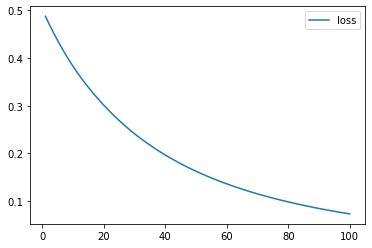

In [11]:
# Creaste a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

# PLot the loss
history_df.plot(y='loss')

<AxesSubplot:>

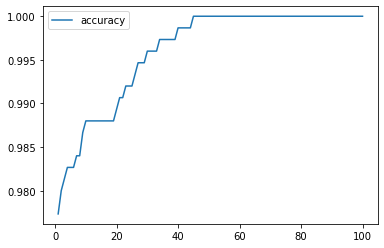

In [12]:
# PLot the accuracy
history_df.plot(y='accuracy')

Evalaute the model with the test data

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0683 - accuracy: 1.0000 - 85ms/epoch - 11ms/step
loss: 0.0683266744017601, Accuracy: 1.0


PREDICT ON A NEW DATASET

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

MOON DATA

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

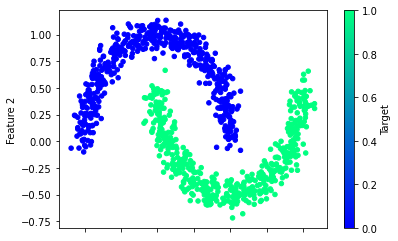

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise =0.08, random_state = 78)

# Transforming y_moons to a vertical vector
y_moons= y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons['Target']=y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x='Feature 1', y='Feature 2', c= 'Target', colormap='winter')

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78)

#Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 954us/step - loss: 1.1028 - accuracy: 0.4893
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9386 - accuracy: 0.5240
Epoch 3/100
24/24 [==============================] - 0s 949us/step - loss: 0.8368 - accuracy: 0.5480
Epoch 4/100
24/24 [==============================] - 0s 976us/step - loss: 0.7695 - accuracy: 0.5747
Epoch 5/100
24/24 [==============================] - 0s 922us/step - loss: 0.7199 - accuracy: 0.5933
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.6053
Epoch 7/100
24/24 [==============================] - 0s 953us/step - loss: 0.6493 - accuracy: 0.6267
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6400
Epoch 9/100
24/24 [==============================] - 0s 984us/step - loss: 0.5970 - accuracy: 0.6507
Epoch 10/100
24/24 [==============================] - 0s 989us/step - loss: 0.5742 - accuracy: 0.

24/24 [==============================] - 0s 875us/step - loss: 0.2659 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 877us/step - loss: 0.2656 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 786us/step - loss: 0.2652 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 852us/step - loss: 0.2648 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 826us/step - loss: 0.2645 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 741us/step - loss: 0.2641 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 783us/step - loss: 0.2638 - accuracy: 0.8907
Epoch 88/100
24/24 [==============================] - 0s 784us/step - loss: 0.2635 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 739us/step - loss: 0.2631 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 783us/step - loss: 0.2629 - accuracy: 

<AxesSubplot:>

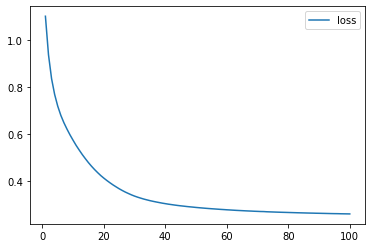

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

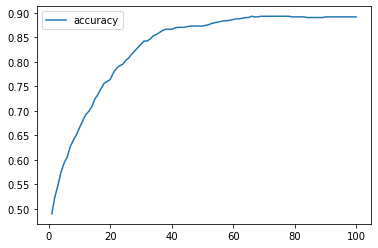

In [22]:
# Plot the accuracy
history_df.plot(y='accuracy')

MULTI-NEURAL MODEL: ADD ANOTHER SEQUENTIAL MODEL TO THE OVERALL MODEL

In [28]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [30]:
# Add the input and the hidden layer
number_inputs = 2
number_hidden_nodes = 6
new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

#add the output layer that uses a probablity activation function
new_model.add(tf.keras.layers.Dense(units =1, activation = 'sigmoid'))

In [31]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs = 100, shuffle = True)

Epoch 1/100
24/24 [==============================] - 0s 651us/step - loss: 0.5765 - accuracy: 0.5320
Epoch 2/100
24/24 [==============================] - 0s 612us/step - loss: 0.5436 - accuracy: 0.5773
Epoch 3/100
24/24 [==============================] - 0s 644us/step - loss: 0.5129 - accuracy: 0.7840
Epoch 4/100
24/24 [==============================] - 0s 668us/step - loss: 0.4846 - accuracy: 0.8280
Epoch 5/100
24/24 [==============================] - 0s 640us/step - loss: 0.4594 - accuracy: 0.8360
Epoch 6/100
24/24 [==============================] - 0s 652us/step - loss: 0.4378 - accuracy: 0.8400
Epoch 7/100
24/24 [==============================] - 0s 671us/step - loss: 0.4189 - accuracy: 0.8493
Epoch 8/100
24/24 [==============================] - 0s 656us/step - loss: 0.4006 - accuracy: 0.8533
Epoch 9/100
24/24 [==============================] - 0s 685us/step - loss: 0.3824 - accuracy: 0.8600
Epoch 10/100
24/24 [==============================] - 0s 654us/step - loss: 0.3643 - accura

24/24 [==============================] - 0s 616us/step - loss: 0.0245 - accuracy: 0.9973
Epoch 82/100
24/24 [==============================] - 0s 609us/step - loss: 0.0237 - accuracy: 0.9973
Epoch 83/100
24/24 [==============================] - 0s 569us/step - loss: 0.0228 - accuracy: 0.9973
Epoch 84/100
24/24 [==============================] - 0s 609us/step - loss: 0.0220 - accuracy: 0.9973
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.0212 - accuracy: 0.9973
Epoch 86/100
24/24 [==============================] - 0s 620us/step - loss: 0.0206 - accuracy: 0.9973
Epoch 87/100
24/24 [==============================] - 0s 609us/step - loss: 0.0199 - accuracy: 0.9973
Epoch 88/100
24/24 [==============================] - 0s 613us/step - loss: 0.0193 - accuracy: 0.9973
Epoch 89/100
24/24 [==============================] - 0s 609us/step - loss: 0.0186 - accuracy: 0.9987
Epoch 90/100
24/24 [==============================] - 0s 620us/step - loss: 0.0180 - accuracy: 